<a href="https://colab.research.google.com/github/KubaWinsztal/MachineLearning/blob/main/Zadanie1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

data importing and standardizing

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

url = 'https://raw.githubusercontent.com/SzymonNowakowski/Machine-Learning-2024/refs/heads/master/PCA_three_clusters_data.csv'
data = pd.read_csv(url)

X = data[['x', 'y', 'z']]
y = data['class']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Definiowanie spójnych kolorów dla klastrów
colors = {0: 'purple', 1: 'turquoise', 2: 'yellow'}

PCA

In [14]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_std)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = y

3D and 2D graphs

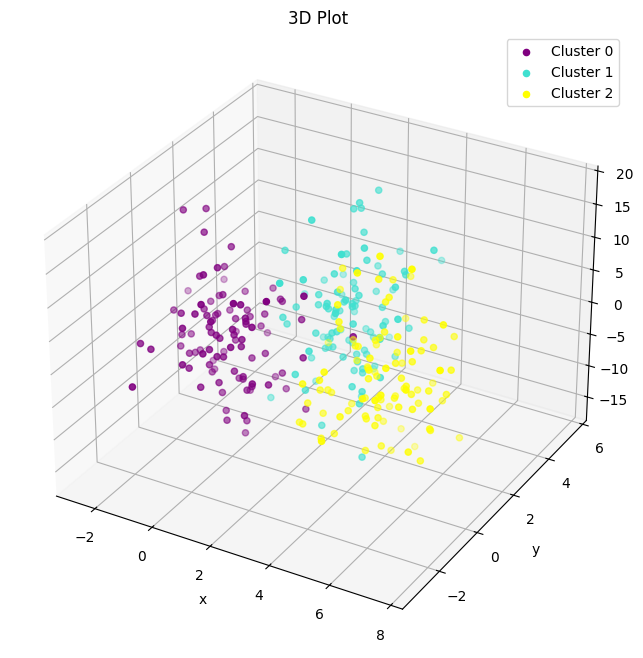

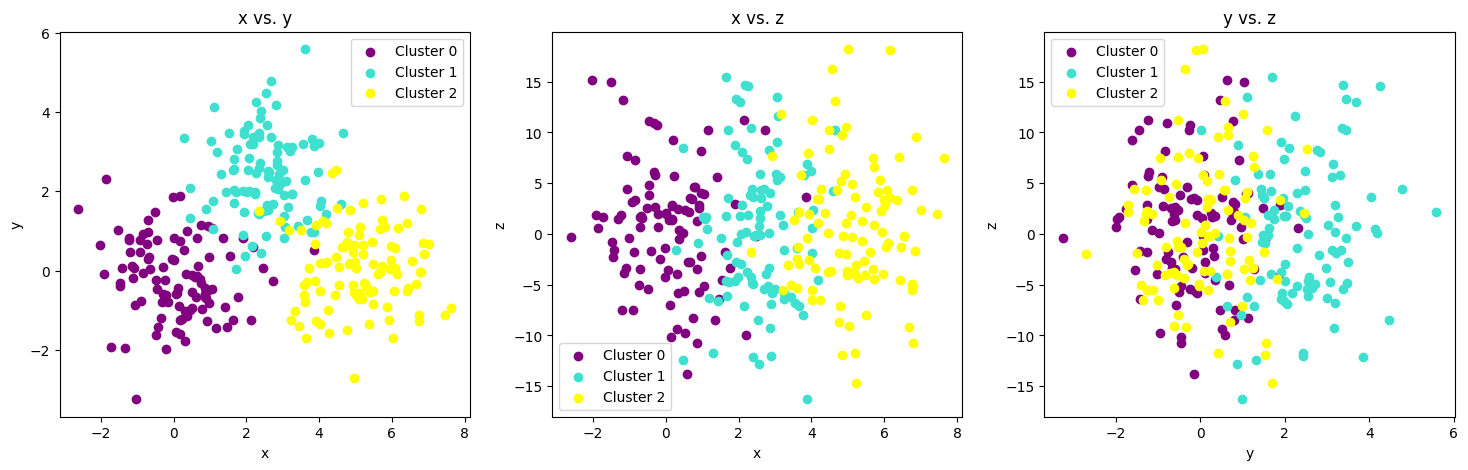

In [15]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for cluster in data['class'].unique():
    cluster_data = data[data['class'] == cluster]
    ax.scatter(cluster_data['x'], cluster_data['y'], cluster_data['z'], label=f'Cluster {cluster}', color=colors[cluster])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D Plot')
ax.legend()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for cluster in data['class'].unique():
    cluster_data = data[data['class'] == cluster]
    axs[0].scatter(cluster_data['x'], cluster_data['y'], label=f'Cluster {cluster}', color=colors[cluster])
    axs[1].scatter(cluster_data['x'], cluster_data['z'], label=f'Cluster {cluster}', color=colors[cluster])
    axs[2].scatter(cluster_data['y'], cluster_data['z'], label=f'Cluster {cluster}', color=colors[cluster])

axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('x vs. y')

axs[1].set_xlabel('x')
axs[1].set_ylabel('z')
axs[1].set_title('x vs. z')

axs[2].set_xlabel('y')
axs[2].set_ylabel('z')
axs[2].set_title('y vs. z')

for ax in axs:
    ax.legend()

plt.show()

PCA graph

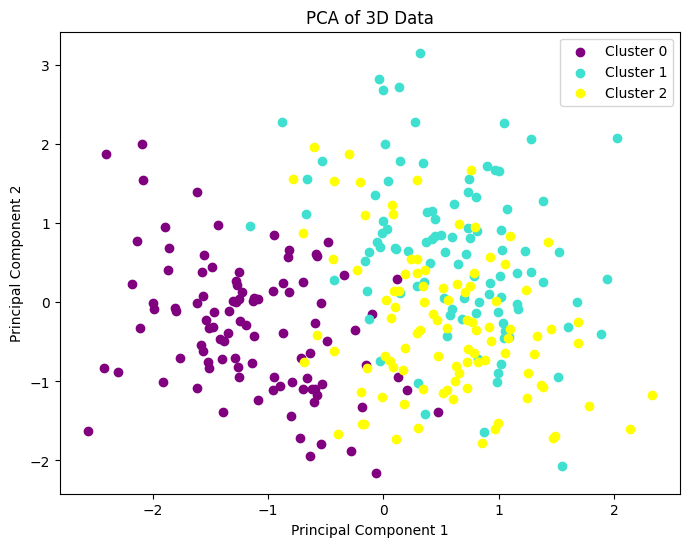

In [16]:
plt.figure(figsize=(8, 6))
for cluster in pca_df['Cluster'].unique():
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', color=colors[cluster])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 3D Data')
plt.legend()
plt.show()

Pytanie 1:

Patrząc na wykresy 2D, na wykresie x vs y najbardziej widać separację między grupami danych, natomiast na dwóch pozostałych (x vs z oraz y vs z) dane nie są już tak dobrze odseparowane. Zastosowanie algorytmu PCA nie poprawiło separacji danych. Głównym powodem, przez który zastosowanie algorytmu PCA nie poprawiło separacji punktów, jest to, że główne kierunki wariancji nie odpowiadały podziałowi na klasy. Dodatkowo, patrząc na wykres 3D widzimy, że dane już na starcie są dość dobrze odseparowane.


Pytanie 2:

Standaryzacja jest konieczna przed zastosowaniem PCA, ponieważ PCA jest wrażliwe na skalę cech. Jeśli cechy mają różne skale, te o większych skalach będą dominować główne składowe, prowadząc do stronniczych wyników. Standaryzacja danych zapewnia, że każda cecha ma średnią 0 i wariancję 1, pozwalając algorytmowi PCA traktować wszystkie cechy jednakowo i znaleźć prawdziwe kierunki maksymalnej wariancji.